In [1]:
install.packages('dslabs')
install.packages('caret', dependencies = TRUE)
install.packages('tidyverse')
install.packages('lubridate')

Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [2]:
library('dslabs')
library('caret')
library('tidyverse')
library('lubridate')

Loading required package: lattice
Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.7
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
data('reported_heights')

In [4]:
dat <- mutate(reported_heights, date_time = ymd_hms(time_stamp)) %>%
  filter(date_time >= make_date(2016, 01, 25) & date_time < make_date(2016, 02, 1)) %>%
  mutate(type = ifelse(day(date_time) == 25 & hour(date_time) == 8 & between(minute(date_time), 15, 30), "inclass","online")) %>%
  select(sex, type)

y <- factor(dat$sex, c("Female", "Male"))
x <- dat$type

In [41]:
#Q2, Q3
table(predicted = y_hat, actual = y)
confusionMatrix(data = y_hat, reference = y)

         actual
predicted Female Male
   Female     26   13
   Male       42   69

Confusion Matrix and Statistics

          Reference
Prediction Female Male
    Female     26   13
    Male       42   69
                                          
               Accuracy : 0.6333          
                 95% CI : (0.5508, 0.7104)
    No Information Rate : 0.5467          
    P-Value [Acc > NIR] : 0.0195893       
                                          
                  Kappa : 0.2323          
 Mcnemar's Test P-Value : 0.0001597       
                                          
            Sensitivity : 0.3824          
            Specificity : 0.8415          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.6216          
             Prevalence : 0.4533          
         Detection Rate : 0.1733          
   Detection Prevalence : 0.2600          
      Balanced Accuracy : 0.6119          
                                          
       'Positive' Class : Female          
                                          

In [44]:
data(iris)
iris <- iris[-which(iris$Species=='setosa'),]
y <- iris$Species

set.seed(2)
test_index <- createDataPartition(y,times=1,p=0.5,list=FALSE)
test <- iris[test_index,]
train <- iris[-test_index,]

Warning message in createDataPartition(y, times = 1, p = 0.5, list = FALSE):
“Some classes have no records ( setosa ) and these will be ignored”

In [93]:
summary(test)
#head(test)

foo <- function(x){
	rangedValues <- seq(range(x)[1],range(x)[2],by=0.1)
	sapply(rangedValues,function(i){
		y_hat <- ifelse(x>i,'virginica','versicolor')
		mean(y_hat==train$Species)
	})
}
predictions <- apply(test[,-5],2,foo)
sapply(predictions,max)	

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.900   Min.   :2.300   Min.   :3.300   Min.   :1.000  
 1st Qu.:5.700   1st Qu.:2.700   1st Qu.:4.425   1st Qu.:1.325  
 Median :6.100   Median :2.900   Median :4.900   Median :1.600  
 Mean   :6.178   Mean   :2.918   Mean   :4.936   Mean   :1.692  
 3rd Qu.:6.500   3rd Qu.:3.075   3rd Qu.:5.600   3rd Qu.:2.000  
 Max.   :7.700   Max.   :3.800   Max.   :6.700   Max.   :2.500  
       Species  
 setosa    : 0  
 versicolor:25  
 virginica :25  
                
                
                

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
        0.78         0.64         0.90         0.94

Warning message in createDataPartition(y, times = 1, p = 0.5, list = FALSE):
“Some classes have no records ( setosa ) and these will be ignored”

[1] 0.92

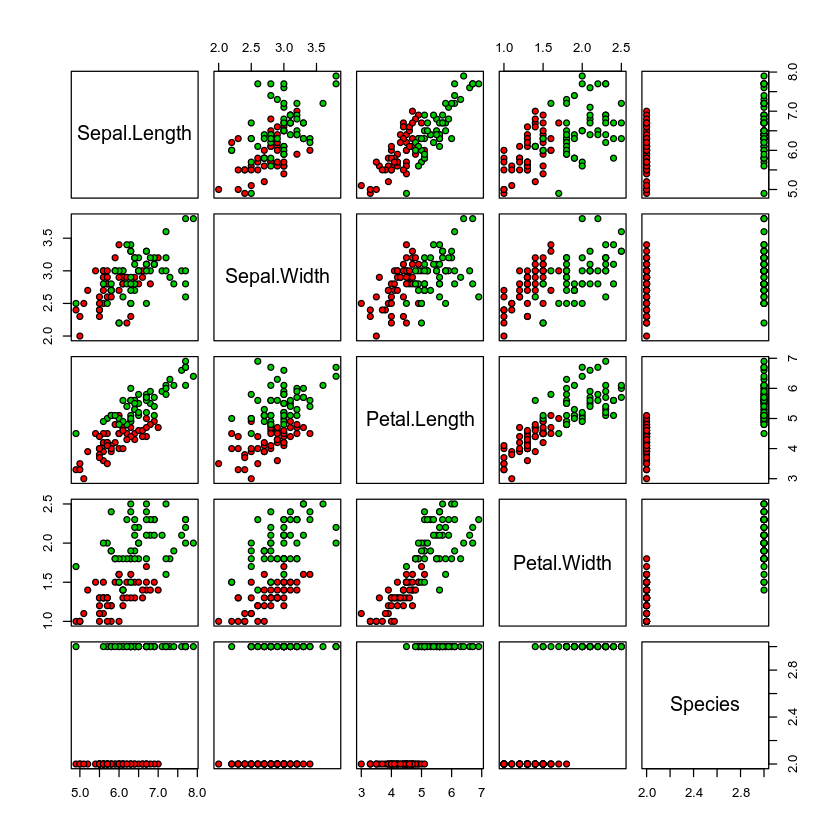

In [95]:
library(caret)
data(iris)
iris <- iris[-which(iris$Species=='setosa'),]
y <- iris$Species

plot(iris,pch=21,bg=iris$Species)

set.seed(2)
test_index <- createDataPartition(y,times=1,p=0.5,list=FALSE)
test <- iris[test_index,]
train <- iris[-test_index,]

petalLengthRange <- seq(range(train[,3])[1],range(train[,3])[2],by=0.1)
petalWidthRange <- seq(range(train[,4])[1],range(train[,4])[2],by=0.1)
cutoffs <- expand.grid(petalLengthRange,petalWidthRange)

id <- sapply(seq(nrow(cutoffs)),function(i){
	y_hat <- ifelse(train[,3]>cutoffs[i,1] | train[,4]>cutoffs[i,2],'virginica','versicolor')
	mean(y_hat==train$Species)
	}) %>% which.max

optimalCutoff <- cutoffs[id,] %>% as.numeric
y_hat <- ifelse(test[,3]>optimalCutoff[1] & test[,4]>optimalCutoff[2],'virginica','versicolor')
mean(y_hat==test$Species)


Conditional Probability

In [97]:
#Q1

sensitivity = 0.84
specificity = 0.9
prevalance = 0.02

#Using Bayes' theorem, calculate the probability that you have the disease if the test is positive.

(sensitivity * prevalance) / (sensitivity * prevalance +
                              (1 - specificity)*(1-prevalance))

[1] 0.1463415

In [139]:
set.seed(1)
disease <- sample(c(0,1), size=1e6, replace=TRUE, prob=c(0.98,0.02))
test <- rep(NA, 1e6)
test[disease==0] <- sample(c(0,1), size=sum(disease==0), replace=TRUE, prob=c(0.90,0.10))
test[disease==1] <- sample(c(0,1), size=sum(disease==1), replace=TRUE, prob=c(0.15, 0.85))

In [101]:
#Q2
sum(test)/1e6
head(disease)


[1] 0.114509

[1] 0 0 0 0 0 0

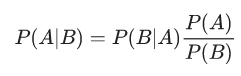

In [117]:
#Q3
table(predicted = test, actual = disease)

3065 / 882426 #yes 0.0034733790708796

         actual
predicted      0      1
        0 882426   3065
        1  97656  16853

[1] 0.003473379

In [147]:
#Q4

#3065 / 16853 #no 0.181866729959058
#3065 / 97656 #no 0.0313856803473417
#16853 / (16853+3065) #no 0.846119088261874
16853 / (16853+97656) #yes 0.147176204490477

#levels(test) <- c(1)
#levels(disease) <- c(1)

#test <- factor(test)
#disease <- factor(disease)
confusionMatrix(data = test, reference = disease)#, postitive = 0)

#You have evrything to calculate the probability.

#P(+|D)=90%
#P(D)=5%
#P(+|D−)=15%
#P(D−)=1−5%=95%

#P(D|+)=0.9∗0.05/(0.9∗0.05+0.15∗0.95)=0.24

#This means even you are test postive your chance to have the disease is 24%
#which is quite low.

[1] 0.1471762

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 882426   3065
         1  97656  16853
                                          
               Accuracy : 0.8993          
                 95% CI : (0.8987, 0.8999)
    No Information Rate : 0.9801          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2244          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9004          
            Specificity : 0.8461          
         Pos Pred Value : 0.9965          
         Neg Pred Value : 0.1472          
             Prevalence : 0.9801          
         Detection Rate : 0.8824          
   Detection Prevalence : 0.8855          
      Balanced Accuracy : 0.8732          
                                          
       'Positive' Class : 0               
                                          

In [153]:
#Q5

(16853 / (16853+97656)) * prevalance #no 0.00294352408980953
(16853 / (16853+97656)) * (prevalance / ((3065+16853)/1e6)) #no 0.147782111146176
(16853 / (16853+97656)) / (prevalance / ((3065+16853)/1e6)) #no 0.146572782052066
#no 0.0235184517752092

[1] 0.002943524

[1] 0.1465728

In [169]:
mean(disease[test==1]==1)/mean(disease==1)

[1] 7.389106

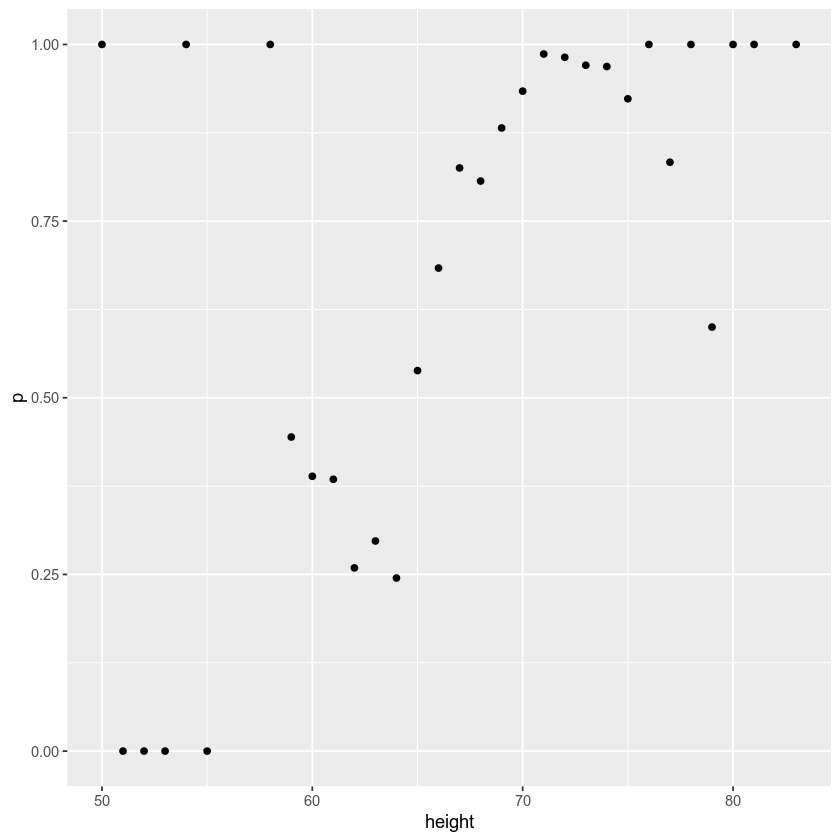

In [155]:
#Q1
library(dslabs)
data("heights")
heights %>% 
	mutate(height = round(height)) %>%
	group_by(height) %>%
	summarize(p = mean(sex == "Male")) %>%
	qplot(height, p, data =.)

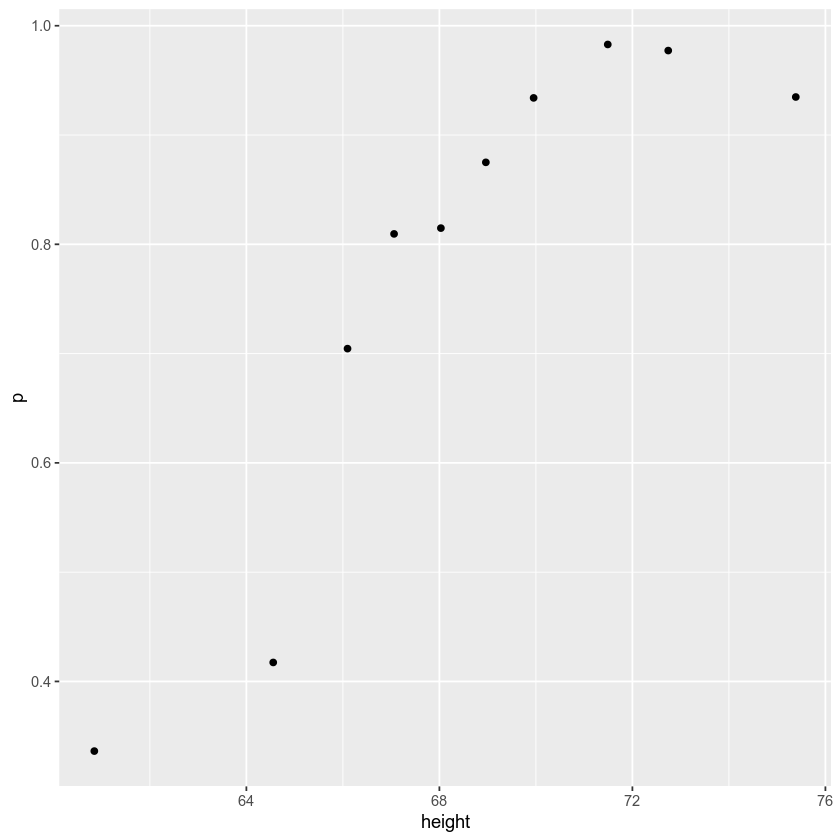

In [156]:
#Q2

ps <- seq(0, 1, 0.1)
heights %>% 
	mutate(g = cut(height, quantile(height, ps), include.lowest = TRUE)) %>%
	group_by(g) %>%
	summarize(p = mean(sex == "Male"), height = mean(height)) %>%
	qplot(height, p, data =.)

In [158]:
#Q3
install.packages('MASS')
library('MASS')

Installing package into ‘/home/user/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


ERROR: Error in value[[3L]](cond): Package ‘MASS’ version 7.3.49 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘MASS’ is imported by ‘ipred’, ‘ddalpha’ so cannot be unloaded



In [159]:
Sigma <- 9*matrix(c(1,0.5,0.5,1), 2, 2)
dat <- MASS::mvrnorm(n = 10000, c(69, 69), Sigma) %>%
	data.frame() %>% setNames(c("x", "y"))

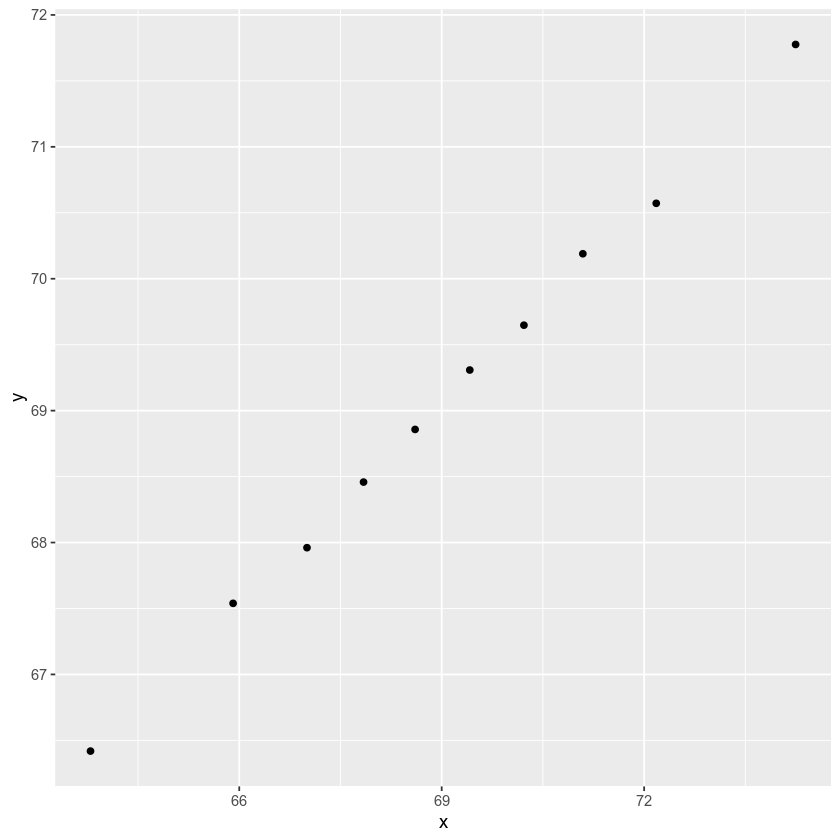

In [160]:
ps <- seq(0, 1, 0.1)
dat %>% 
	mutate(g = cut(x, quantile(x, ps), include.lowest = TRUE)) %>%
group_by(g) %>%
summarize(y = mean(y), x = mean(x)) %>%
	qplot(x, y, data =.)